In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Input
from keras import optimizers
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import scipy.stats as stats
from keras.layers import Bidirectional
from wordcloud import WordCloud
import re
from wordcloud import STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk import ngrams
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
stock='/content/drive/MyDrive/Colab Notebooks/sp500.csv'
nlp='/content/drive/MyDrive/Colab Notebooks/reuters_headlines.csv'
data1=pd.read_csv(stock)
news=pd.read_csv(nlp)

In [62]:
data1.shape

(589, 7)

In [63]:
news.shape

(32770, 3)

In [64]:
data1.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.        589
Change %      0
dtype: int64

In [65]:
news.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [66]:
data1.head(589)

,Date,Price,Open,High,Low,Vol.,Change %
0,7/20/2020,3251.84,3224.29,3258.61,3215.16,NaN,0.84%
1,7/17/2020,3224.73,3224.21,3233.52,3205.65,NaN,0.28%
2,7/16/2020,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
3,7/15/2020,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
4,7/14/2020,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
...,...,...,...,...,...,...,...
584,3/23/2018,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
585,3/22/2018,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
586,3/21/2018,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
587,3/20/2018,2716.94,2715.05,2724.22,2710.05,NaN,0.15%


In [67]:
data1.set_index('Date', inplace=True)

In [68]:
data1

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
7/20/2020,3251.84,3224.29,3258.61,3215.16,NaN,0.84%
7/17/2020,3224.73,3224.21,3233.52,3205.65,NaN,0.28%
7/16/2020,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%
7/15/2020,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
7/14/2020,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
...,...,...,...,...,...,...
3/23/2018,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
3/22/2018,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
3/21/2018,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%


In [69]:
data=data1[::-1]
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
3/19/2018,2712.92,2741.38,2741.38,2694.59,NaN,-1.42%
3/20/2018,2716.94,2715.05,2724.22,2710.05,NaN,0.15%
3/21/2018,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
3/22/2018,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
3/23/2018,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
...,...,...,...,...,...,...
7/14/2020,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
7/15/2020,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
7/16/2020,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%


In [70]:
news

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [71]:
news1=news[::-1]
news1

,Headlines,Time,Description
32769,UK will always consider ways to improve data l...,Mar 20 2018,Britain will consider any suggestions to give ...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
...,...,...,...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...


In [72]:
def gen_freq(text):
  word_list=[]

  for words in text.split():
    word_list.extend(words)

  word_freq=pd.Series(word_list).value_counts()
  word_freq[:20]

  return word_freq

gen_freq(news1.Headlines.str)

to          12489
in           6453
U.S.         6238
on           4693
for          4414
            ...  
fuss            1
TLTRO           1
loans?          1
Kale            1
Belarus,        1
Length: 30985, dtype: int64

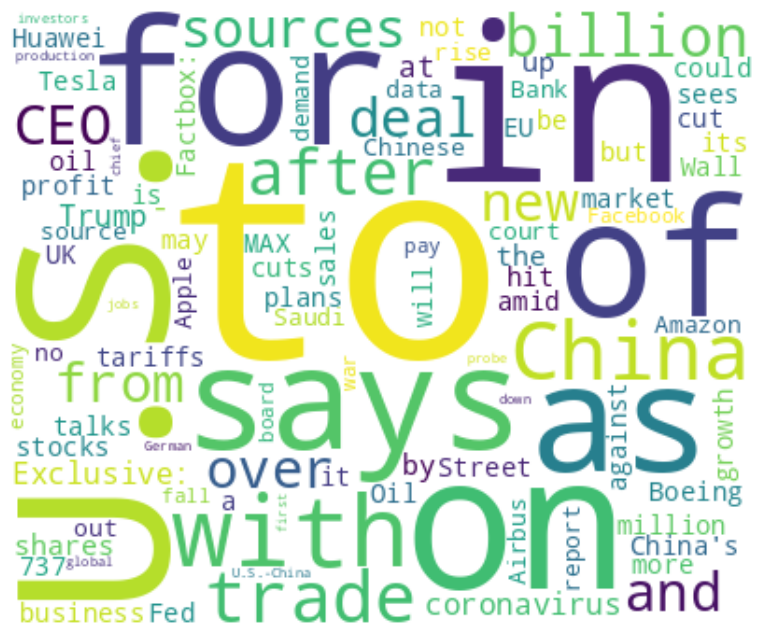

In [73]:
word_freq=gen_freq(news1.Headlines.str)
w=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
def clean_text(text):
    text=re.sub(r'RT', '', text)
    text = re.sub(r'&amp;', '&', text)

    text = re.sub(r'[?!.;:,#@-]', '', text)

    text = text.lower()
    return text

In [75]:
news1['clean_text'] = news1.Headlines.apply(lambda x: clean_text(x))
news1

<ipython-input-75-54a71096d927>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news1['clean_text'] = news1.Headlines.apply(lambda x: clean_text(x))


,Headlines,Time,Description,clean_text
32769,UK will always consider ways to improve data l...,Mar 20 2018,Britain will consider any suggestions to give ...,uk will always consider ways to improve data l...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,pratt & whitney to deliver spare a320neo engin...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,mcdonald's sets greenhouse gas reduction targets
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,prosecutors search volkswagen headquarters in ...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,malaysia says never hired british data firm at...
...,...,...,...,...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...,us republicans seek liability protections as c...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...,twitter says attackers downloaded data from up...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...,trail of missing wirecard executive leads to b...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...,disney cuts ad spending on facebook amid growi...


In [76]:
print(STOPWORDS)

{'then', 'else', "they've", 'k', "she's", "hasn't", 'there', 'each', "they'll", 'into', 'again', 'be', 'how', 'of', 'or', 'i', "she'd", "you've", 'itself', 'very', 'no', 'my', 'have', 'by', 'not', "mustn't", 'ourselves', 'however', 'our', 'which', 'some', 'than', 'also', "weren't", 'against', 'them', 'on', "aren't", 'has', 'its', 'cannot', "haven't", 'been', 'his', 'ought', 'com', 'were', "doesn't", "i'll", "he'd", 'did', "didn't", 'whom', 'why', 'ours', 'was', 'what', 'herself', 'most', "can't", 'these', 'had', 'to', 'yourself', "he'll", 'during', 'over', 'because', "you'd", 'when', 'below', "wouldn't", 'does', "you'll", 'since', "wasn't", "we've", 'all', 'shall', 'they', 'for', 'above', "isn't", "they're", "don't", 'her', 'about', 'until', 'that', 'hence', 'hers', 'yours', 'it', 'the', 'nor', 'once', 'further', 'like', 'theirs', 'could', 'you', 'himself', 'only', 'down', 'same', 'she', "there's", "they'd", 'am', 'can', "hadn't", 'he', "i'd", 'from', "won't", 'your', 'at', 'off', 'whi

In [77]:
news3 = news1.Headlines.apply(lambda x: clean_text(x))
word_freq = gen_freq(news3.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

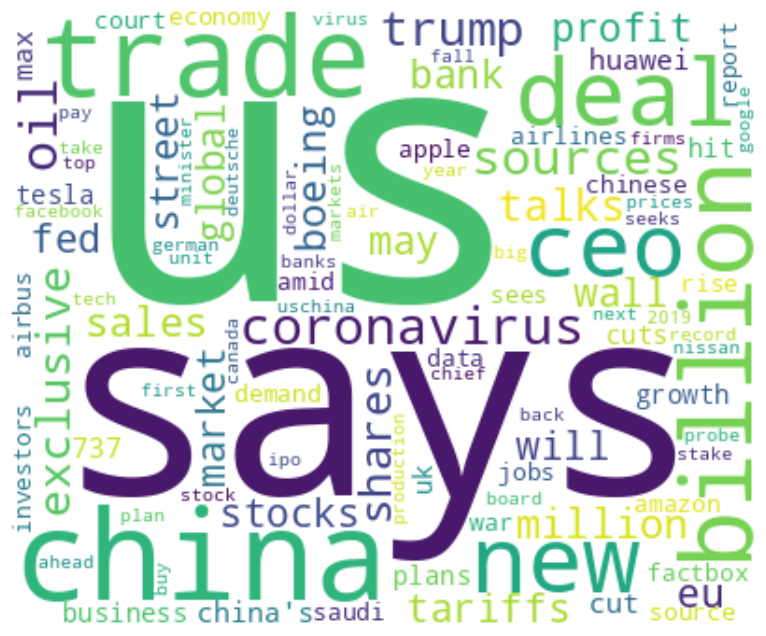

In [78]:
w=WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,8))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [81]:
news1[:]

,Headlines,Time,Description,clean_text
32769,UK will always consider ways to improve data l...,Mar 20 2018,Britain will consider any suggestions to give ...,uk will always consider ways to improve data l...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,pratt & whitney to deliver spare a320neo engin...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,mcdonald's sets greenhouse gas reduction targets
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,prosecutors search volkswagen headquarters in ...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,malaysia says never hired british data firm at...
...,...,...,...,...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...,us republicans seek liability protections as c...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...,twitter says attackers downloaded data from up...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...,trail of missing wirecard executive leads to b...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...,disney cuts ad spending on facebook amid growi...


In [82]:
analyzer = SentimentIntensityAnalyzer()
news1['polarity'] = news1['clean_text'].apply(lambda x: analyzer.polarity_scores(x))
news1.head(10)

<ipython-input-82-eceffcf45dcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news1['polarity'] = news1['clean_text'].apply(lambda x: analyzer.polarity_scores(x))


,Headlines,Time,Description,clean_text,polarity
32769,UK will always consider ways to improve data l...,Mar 20 2018,Britain will consider any suggestions to give ...,uk will always consider ways to improve data l...,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,pratt & whitney to deliver spare a320neo engin...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,mcdonald's sets greenhouse gas reduction targets,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,prosecutors search volkswagen headquarters in ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,malaysia says never hired british data firm at...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32764,EU demands 'unilateral' power over UK banks' a...,Mar 20 2018,European Union governments will insist on thei...,eu demands 'unilateral' power over uk banks' a...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
32763,White House welcomes looks into reports Trump'...,Mar 20 2018,President Donald Trump wants Americans' privac...,white house welcomes looks into reports trump'...,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp..."
32762,Kenya's ruling party says hired firm linked to...,Mar 20 2018,Kenya's ruling Jubilee party said on Tuesday i...,kenya's ruling party says hired firm linked to...,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp..."
32761,Exxon eyes Gulf of Mexico plastics plant to me...,Mar 20 2018,Exxon Mobil Corp said on Tuesday it was plann...,exxon eyes gulf of mexico plastics plant to me...,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou..."
32760,BMW searched by German police in emissions swoop,Mar 20 2018,BMW's headquarters were raided on Tuesday by G...,bmw searched by german police in emissions swoop,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [83]:
news1 = pd.concat(
    [news1['polarity'].apply(pd.Series)], axis=1)

In [84]:
news1

,neg,neu,pos,compound
32769,0.000,0.791,0.209,0.4404
32768,0.000,1.000,0.000,0.0000
32767,0.000,1.000,0.000,0.0000
32766,0.000,1.000,0.000,0.0000
32765,0.000,1.000,0.000,0.0000
...,...,...,...,...
4,0.462,0.538,0.000,-0.6124
3,0.270,0.730,0.000,-0.5719
2,0.180,0.820,0.000,-0.2960
1,0.341,0.530,0.129,-0.4215


In [85]:
news_train = news1[0:np.int16(0.8*news1.shape[0])]
news_test = news1[np.int16(0.8*news1.shape[0]):]

In [86]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
3/19/2018,2712.92,2741.38,2741.38,2694.59,NaN,-1.42%
3/20/2018,2716.94,2715.05,2724.22,2710.05,NaN,0.15%
3/21/2018,2711.93,2714.99,2739.14,2709.79,NaN,-0.18%
3/22/2018,2643.69,2691.36,2695.68,2641.59,NaN,-2.52%
3/23/2018,2588.26,2646.71,2657.67,2585.89,NaN,-2.10%
...,...,...,...,...,...,...
7/14/2020,3197.52,3141.11,3200.95,3127.66,NaN,1.34%
7/15/2020,3226.56,3225.98,3238.28,3200.76,NaN,0.91%
7/16/2020,3215.57,3208.36,3220.39,3198.59,NaN,-0.34%


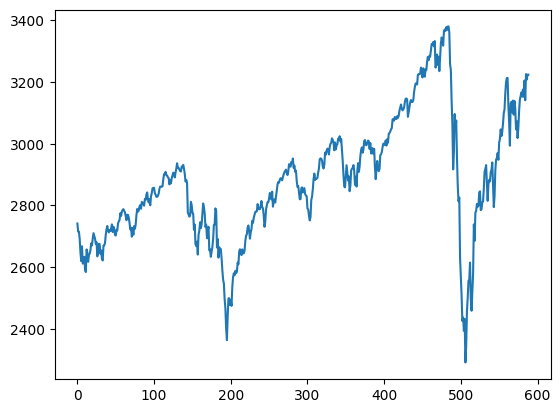

In [87]:
data2=data.iloc[:,1:2].values
plt.plot(data2)

In [88]:
data_train = data2[0:np.int16(0.8*data1.shape[0])]
data_test = data2[np.int16(0.8*data1.shape[0]):]

In [89]:
data_train.shape

(471, 1)

In [90]:
data_test.shape

(118, 1)

In [91]:
data_train.mean()
data_z = (data_train-data_train.mean())/(data_train.std())
data_z.mean()

1.8102999637200005e-15

In [92]:
x_train = []
y_train = []

for i in range (5, len(data_z)):
  x_train.append(data_z[i-5:i,0])
  y_train.append(data_z[i,0])
  if i<=10:
    print(x_train)
    print(y_train)
    print()

[array([-0.6592396 , -0.80809023, -0.80842943, -0.94201623, -1.19443479])]
[-1.3491082880150476]

[array([-0.6592396 , -0.80809023, -0.80842943, -0.94201623, -1.19443479]), array([-0.80809023, -0.80842943, -0.94201623, -1.19443479, -1.34910829])]
[-1.3491082880150476, -1.076507549492399]

[array([-0.6592396 , -0.80809023, -0.80842943, -0.94201623, -1.19443479]), array([-0.80809023, -0.80842943, -0.94201623, -1.19443479, -1.34910829]), array([-0.80842943, -0.94201623, -1.19443479, -1.34910829, -1.07650755])]
[-1.3491082880150476, -1.076507549492399, -1.3946171213851686]

[array([-0.6592396 , -0.80809023, -0.80842943, -0.94201623, -1.19443479]), array([-0.80809023, -0.80842943, -0.94201623, -1.19443479, -1.34910829]), array([-0.80842943, -0.94201623, -1.19443479, -1.34910829, -1.07650755]), array([-0.94201623, -1.19443479, -1.34910829, -1.07650755, -1.39461712])]
[-1.3491082880150476, -1.076507549492399, -1.3946171213851686, -1.3770354478719928]

[array([-0.6592396 , -0.80809023, -0.8084

In [93]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [94]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[-0.6592396 ],
        [-0.80809023],
        [-0.80842943],
        [-0.94201623],
        [-1.19443479]],

       [[-0.80809023],
        [-0.80842943],
        [-0.94201623],
        [-1.19443479],
        [-1.34910829]],

       [[-0.80842943],
        [-0.94201623],
        [-1.19443479],
        [-1.34910829],
        [-1.07650755]],

       ...,

       [[ 2.61767907],
        [ 2.66850197],
        [ 2.58794286],
        [ 2.68591405],
        [ 2.20007192]],

       [[ 2.66850197],
        [ 2.58794286],
        [ 2.68591405],
        [ 2.20007192],
        [ 2.24637221]],

       [[ 2.58794286],
        [ 2.68591405],
        [ 2.20007192],
        [ 2.24637221],
        [ 2.43920529]]])

In [95]:
news3=news_train.iloc[:,3:4].values
news3

array([[ 0.4404],
       [ 0.    ],
       [ 0.    ],
       ...,
       [ 0.    ],
       [ 0.    ],
       [-0.4019]])

In [96]:
news4=news_test.iloc[:,3:4].values
news4

array([[-0.6597],
       [-0.5267],
       [ 0.    ],
       ...,
       [-0.296 ],
       [-0.4215],
       [ 0.    ]])

Epoch 1/100
24/24 [==============================] - 3s 6ms/step - loss: 0.5937
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.2312
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1522
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.1457
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1384
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1365
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1342
Epoch 8/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1309
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1285
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1258
Epoch 11/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1259
Epoch 12/100
24/24 [==============================] - 0s 6ms/step - loss: 0.1272
Epoch 13/100
24/24 [=================

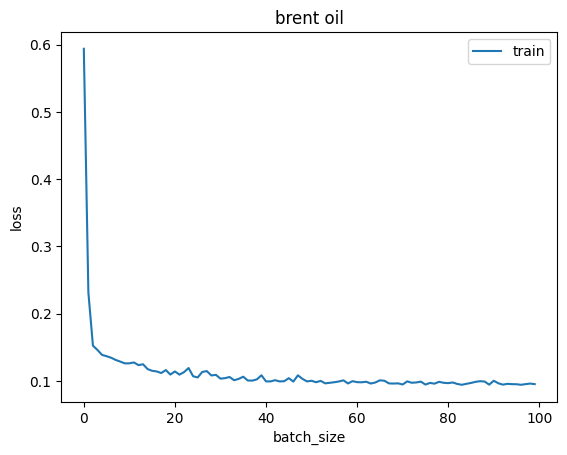

In [97]:
from typing import Sequence
model = Sequential()
tf.keras.layers.Conv1D(64, 1, activation='relu',  input_shape=(x_train.shape[1],news3.shape[1]))
model.add(Bidirectional(LSTM(64, activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_absolute_error',optimizer='adam')
history=model.fit(x_train,y_train, epochs=100, batch_size=20)
plt.plot(history.history['loss'], label='train')
plt.title('brent oil')
plt.ylabel('loss')
plt.xlabel('batch_size')
plt.legend()
plt.show()

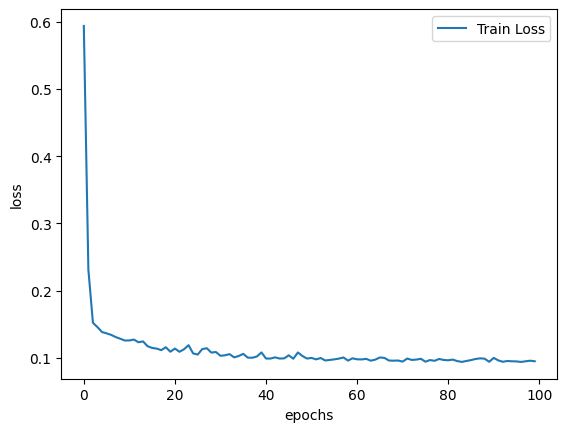

In [98]:
plt.plot(history.history['loss'], label='Train Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [99]:
data_test.mean()
data_z_test = (data_test-data_test.mean())/(data_test.std())
data_z_test

array([[ 1.18755339],
       [ 1.01217784],
       [ 1.18109001],
       [ 1.34755962],
       [ 1.42275278],
       [ 1.38750481],
       [ 1.32264555],
       [ 1.50147825],
       [ 1.51887677],
       [ 1.50159099],
       [ 1.54736073],
       [ 1.51339041],
       [ 1.5560412 ],
       [ 1.55626667],
       [ 1.48129898],
       [ 1.09466109],
       [ 1.02450336],
       [ 0.65233292],
       [ 0.36163114],
       [-0.1856518 ],
       [ 0.02996956],
       [ 0.489095  ],
       [ 0.29853803],
       [ 0.41108351],
       [-0.04548664],
       [-0.38485167],
       [-0.57428131],
       [-0.52873702],
       [-1.26052691],
       [-1.48926292],
       [-1.71999055],
       [-2.03162317],
       [-1.99088885],
       [-2.1525485 ],
       [-2.00802432],
       [-2.53873545],
       [-2.33682998],
       [-1.91096089],
       [-1.74742234],
       [-1.54232276],
       [-1.53063607],
       [-1.3212902 ],
       [-1.75948481],
       [-1.9080674 ],
       [-1.69620381],
       [-1

In [100]:
x_test = []
y_test = []

for i in range (5, len(data_z_test)):
  x_test.append(data_z_test[i-5:i,0])
  y_test.append(data_z_test[i,0])
  if i<=10:
    print(x_test)
    print(y_test)
    print()

[array([1.18755339, 1.01217784, 1.18109001, 1.34755962, 1.42275278])]
[1.3875048140481794]

[array([1.18755339, 1.01217784, 1.18109001, 1.34755962, 1.42275278]), array([1.01217784, 1.18109001, 1.34755962, 1.42275278, 1.38750481])]
[1.3875048140481794, 1.3226455479865131]

[array([1.18755339, 1.01217784, 1.18109001, 1.34755962, 1.42275278]), array([1.01217784, 1.18109001, 1.34755962, 1.42275278, 1.38750481]), array([1.18109001, 1.34755962, 1.42275278, 1.38750481, 1.32264555])]
[1.3875048140481794, 1.3226455479865131, 1.5014782520348746]

[array([1.18755339, 1.01217784, 1.18109001, 1.34755962, 1.42275278]), array([1.01217784, 1.18109001, 1.34755962, 1.42275278, 1.38750481]), array([1.18109001, 1.34755962, 1.42275278, 1.38750481, 1.32264555]), array([1.34755962, 1.42275278, 1.38750481, 1.32264555, 1.50147825])]
[1.3875048140481794, 1.3226455479865131, 1.5014782520348746, 1.5188767689448124]

[array([1.18755339, 1.01217784, 1.18109001, 1.34755962, 1.42275278]), array([1.01217784, 1.1810900

In [101]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [102]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test

array([[[ 1.18755339],
        [ 1.01217784],
        [ 1.18109001],
        [ 1.34755962],
        [ 1.42275278]],

       [[ 1.01217784],
        [ 1.18109001],
        [ 1.34755962],
        [ 1.42275278],
        [ 1.38750481]],

       [[ 1.18109001],
        [ 1.34755962],
        [ 1.42275278],
        [ 1.38750481],
        [ 1.32264555]],

       [[ 1.34755962],
        [ 1.42275278],
        [ 1.38750481],
        [ 1.32264555],
        [ 1.50147825]],

       [[ 1.42275278],
        [ 1.38750481],
        [ 1.32264555],
        [ 1.50147825],
        [ 1.51887677]],

       [[ 1.38750481],
        [ 1.32264555],
        [ 1.50147825],
        [ 1.51887677],
        [ 1.50159099]],

       [[ 1.32264555],
        [ 1.50147825],
        [ 1.51887677],
        [ 1.50159099],
        [ 1.54736073]],

       [[ 1.50147825],
        [ 1.51887677],
        [ 1.50159099],
        [ 1.54736073],
        [ 1.51339041]],

       [[ 1.51887677],
        [ 1.50159099],
        [ 1.547360

In [103]:
predictions = model.predict(x_test,news4.shape[1])
predictions

113/113 [==============================] - 2s 7ms/step


array([[ 1.387148  ],
       [ 1.3756453 ],
       [ 1.3482044 ],
       [ 1.5080522 ],
       [ 1.5134027 ],
       [ 1.5070653 ],
       [ 1.5546968 ],
       [ 1.5343059 ],
       [ 1.575491  ],
       [ 1.5725536 ],
       [ 1.5141648 ],
       [ 1.1863469 ],
       [ 1.1391683 ],
       [ 0.75361925],
       [ 0.4321018 ],
       [-0.18132825],
       [ 0.05977055],
       [ 0.49666005],
       [ 0.30539826],
       [ 0.3832639 ],
       [-0.02938775],
       [-0.43560207],
       [-0.5974252 ],
       [-0.5145186 ],
       [-1.1895458 ],
       [-1.4566602 ],
       [-1.6984028 ],
       [-2.0247931 ],
       [-1.9622663 ],
       [-2.1476958 ],
       [-1.943954  ],
       [-2.637431  ],
       [-2.2198527 ],
       [-1.7818006 ],
       [-1.7416893 ],
       [-1.5081565 ],
       [-1.5316899 ],
       [-1.269826  ],
       [-1.7977034 ],
       [-1.900721  ],
       [-1.6432025 ],
       [-1.4044334 ],
       [-0.769725  ],
       [-1.0987678 ],
       [-0.66251034],
       [-0

In [104]:
predictions_r = ((predictions*(data_test.std()))+(data_test.mean()))
predictions_r

array([[3335.445 ],
       [3332.384 ],
       [3325.0815],
       [3367.6194],
       [3369.0432],
       [3367.357 ],
       [3380.0322],
       [3374.606 ],
       [3385.566 ],
       [3384.7842],
       [3369.246 ],
       [3282.009 ],
       [3269.454 ],
       [3166.8538],
       [3081.2932],
       [2918.0505],
       [2982.2104],
       [3098.4731],
       [3047.5757],
       [3068.2969],
       [2958.4841],
       [2850.3845],
       [2807.321 ],
       [2829.3838],
       [2649.7493],
       [2578.666 ],
       [2514.335 ],
       [2427.4775],
       [2444.117 ],
       [2394.7715],
       [2448.9902],
       [2264.4458],
       [2375.5693],
       [2492.1416],
       [2502.8157],
       [2564.9622],
       [2558.6997],
       [2628.3855],
       [2487.9094],
       [2460.495 ],
       [2529.0244],
       [2592.5645],
       [2761.4697],
       [2673.9065],
       [2790.001 ],
       [2786.403 ],
       [2808.0415],
       [2799.0283],
       [2802.2053],
       [2840.9878],


In [105]:
mae = mean_absolute_error(data_test[5:],predictions_r)
mae

45.83737261476769

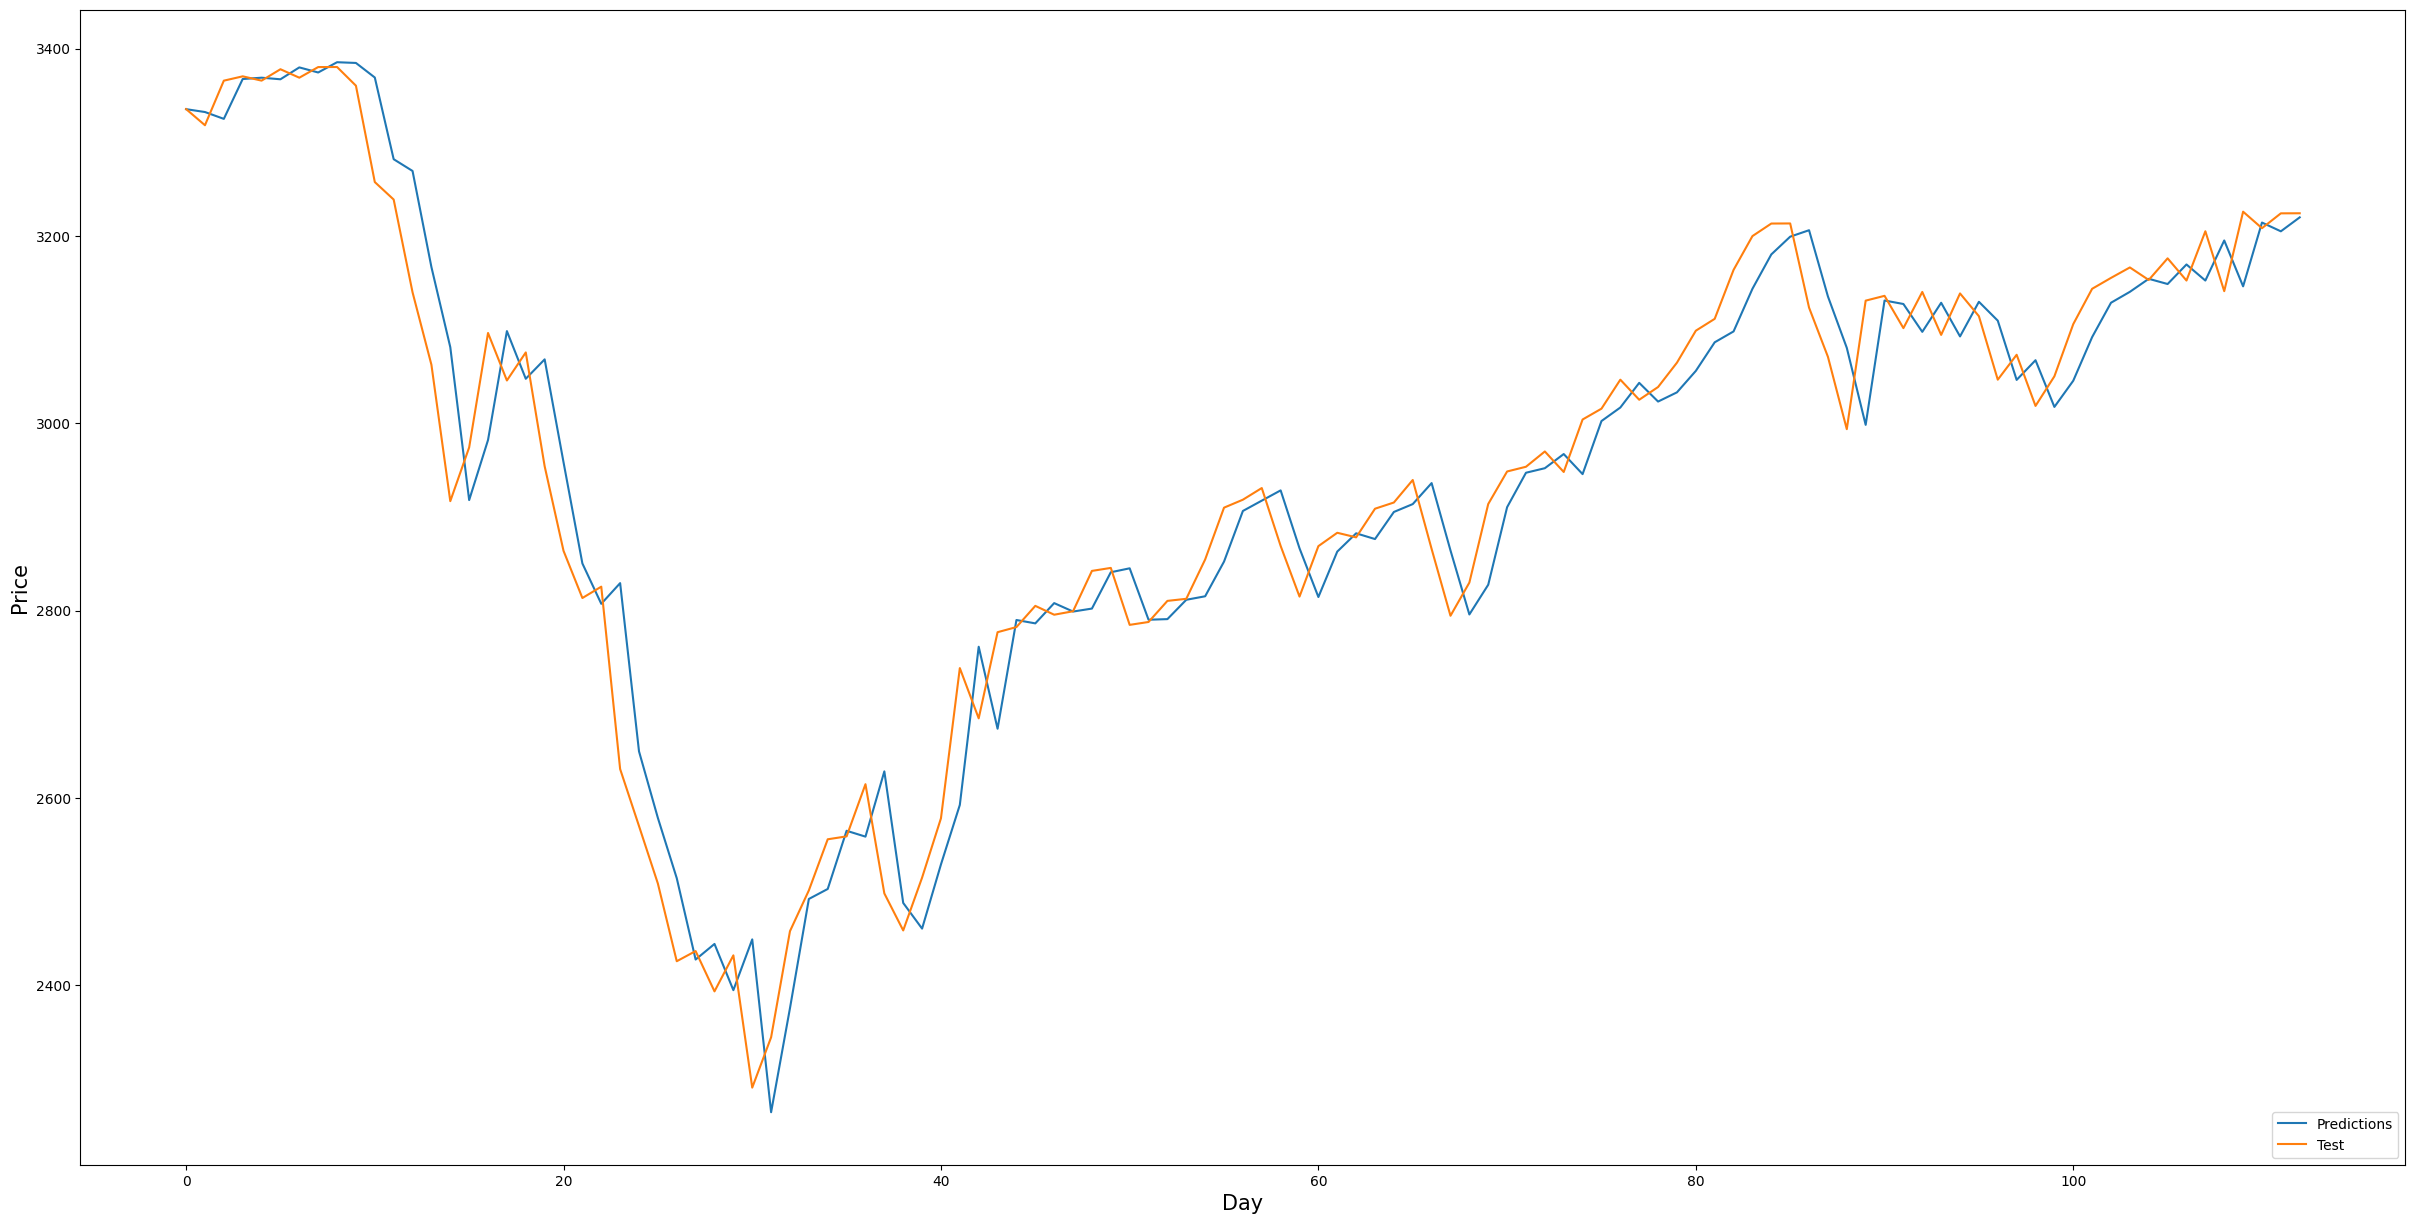

In [106]:
plt.figure(figsize=(30,15))
plt.plot(predictions_r)
plt.plot(data_test[5:])
plt.legend(['Predictions','Test'], loc='lower right')
plt.ylabel('Price',fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.show()